In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# Variance Inflation Factor

In [25]:
# multicollinearity
X1 = np.array([1, 2, 3, 4])
X2 = np.array([2, 4, 6, 8])
Y = 2 + X1 + X2 + 0.1 * np.random.normal(0, 0.5, 4)
df = pd.DataFrame({"X1": X1, "X2": X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const    2.108203
X1       0.591947
X2       1.183895
dtype: float64

In [26]:
variance_inflation_factor(df, 0)

/Users/joshuavk2/Library/Python/3.12/lib/python/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf

In [20]:
Y - (2 - 101 * X1 + 52 * X2)

array([ 0.00113895,  0.09033904, -0.03463501, -0.01971542])

In [21]:
num = 100000
np.random.seed(0)
X1 = np.random.normal(0, 1, (num,))
X2 = X1 + np.random.normal(0, 1, (num,))
X3 = X1 + np.random.normal(0, 1, (num,))
X4 = X1 + np.random.normal(0, 1, (num,))
Y = 2 + X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
results = sm.OLS(Y, df).fit()
results.params

X1    0.989071
X2    1.014330
X3    0.991308
X4    1.009498
dtype: float64

In [28]:
num = 1000
np.random.seed(0)
X1 = np.random.normal(0, 1, (num,))
X2 = X1 + np.random.normal(0, 1, (num,))
X3 = X1 + np.random.normal(0, 1, (num,))
X4 = X1 + np.random.poisson(1, (num,))
Y = X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})

In [29]:
results = sm.OLS(Y, df).fit()
results.params

X1    0.972530
X2    0.971749
X3    1.052539
X4    1.001313
dtype: float64

In [30]:
variance_inflation_factor(df, 0) # how well can feature 0 be predicted by linearly combining the others?  (1 = lowest)
# 1 / (1 - R^2)

3.575555547209495

In [31]:
for n in range(len(df.columns)):
    print(variance_inflation_factor(df, n), n)

3.575555547209495 0
1.9778830278271193 1
2.002979651929489 2
1.5357753350233414 3


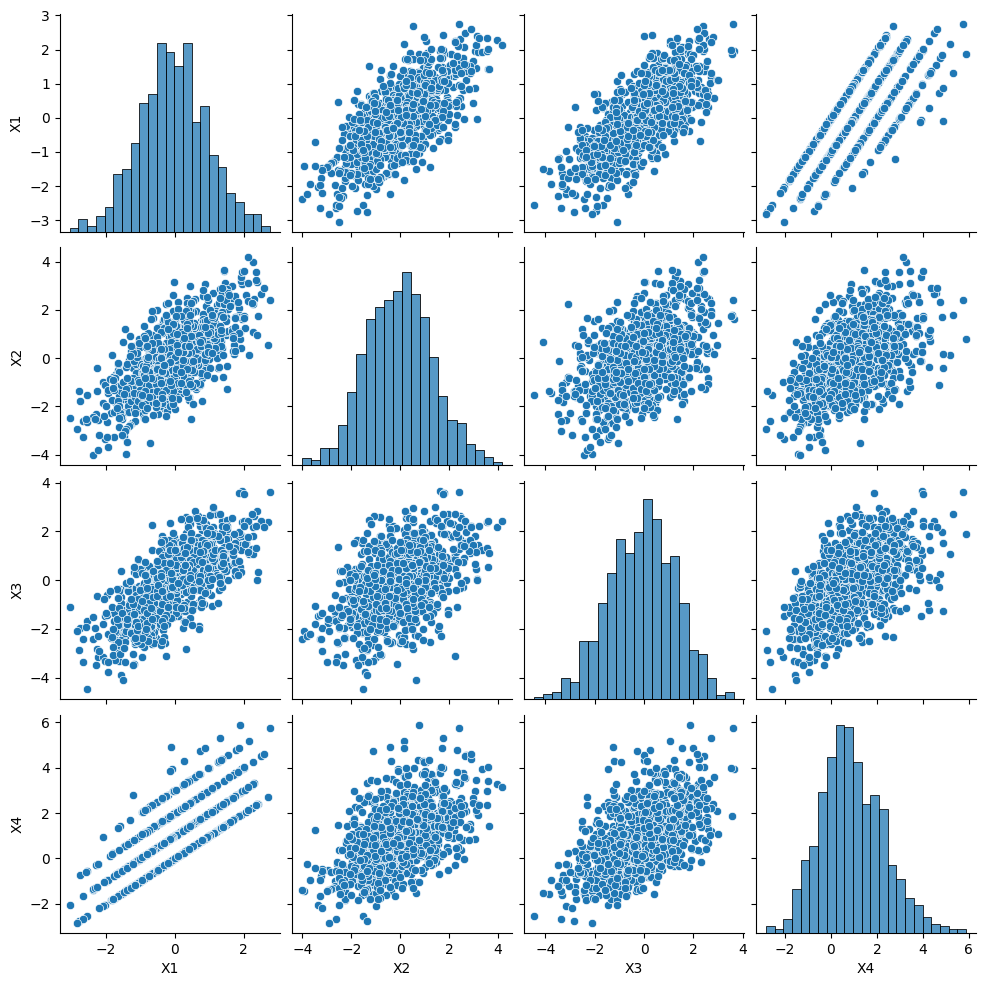

In [8]:
sns.pairplot(df)

In [36]:
X1 = np.random.normal(0, 1, 1000)
X2 = X1 + 0.333 * np.random.normal(0, 1, 1000)
df = pd.DataFrame({"X1": X1, "X2": X2})
variance_inflation_factor(df, 1)

9.557989570366

In [47]:
def func(corr_const):
    return 1 / corr_const

np.random.seed(0)
for corr_const in range(1, 10):
    num = 1000
    X1 = np.random.normal(0, 1, (num,))
    X2 = X1 + func(corr_const) * np.random.normal(0, 1, (num,))
    X3 = np.random.normal(0, 1, (num,))
    X4 = np.random.poisson(1, (num,))
    df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
    print(func(corr_const), variance_inflation_factor(df, 0))
    if(variance_inflation_factor(df, 0) > 5 and variance_inflation_factor(df, 0) < 10):
        print("Moderately high")
    if(variance_inflation_factor(df, 0) >= 10):
        print("Very high")

1.0 1.979030209811762
0.5 4.846431170512527
0.3333333333333333 9.169467307283558
Moderately high
0.25 15.40738684451113
Very high
0.2 24.05557009464992
Very high
0.16666666666666666 41.064563333651435
Very high
0.14285714285714285 53.18646915757921
Very high
0.125 69.18270371426617
Very high
0.1111111111111111 75.92724304979538
Very high


In [48]:
num = 1000
for corr_const in [3, 5, 10, 15, 20, 100]:
    np.random.seed(0)
    X1 = np.random.normal(0, 1, (num,))
    X2 = X1 + func(corr_const) * np.random.normal(0, 1, (num,))
    X3 = np.random.normal(0, 1, (num,))
    X4 = np.random.poisson(1, (num,))
    Y = X1 + X2 + X3 + X4 + np.random.normal(0, 1, (num,))
    df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "X4": X4})
    model = sm.OLS(Y, sm.add_constant(df))
    results = model.fit()
    print(corr_const, list(results.params))

3 [0.019258769347945754, 1.0842819076207713, 0.91467199203987, 1.0530195434938523, 0.9909982345296544]
5 [0.01925876934794679, 1.141167246260856, 0.8577866533997845, 1.053019543493853, 0.9909982345296544]
10 [0.0192587693479448, 1.2833805928610573, 0.7155733067995825, 1.0530195434938543, 0.9909982345296551]
15 [0.019258769347944574, 1.425593939461273, 0.5733599601993647, 1.0530195434938525, 0.9909982345296557]
20 [0.019258769347945494, 1.567807286061476, 0.43114661359916384, 1.053019543493852, 0.9909982345296557]
100 [0.019258769347945112, 3.843220831664711, -1.8442669320040679, 1.053019543493853, 0.9909982345296553]


# Polynomial and Interaction Terms

In [39]:
num = 1000
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
Y = X1 + X2 + 3 * X1**2 + 4 * X1 * X2 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X1_sq": X1**2, "X_int": X1 * X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const    0.017735
X1       0.979832
X2       1.030269
X1_sq    2.985641
X_int    3.982815
dtype: float64

In [42]:
num = 100000
pd.set_option('display.max_rows', 200)
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
Y = X1 + 2 * X2 + 3 * X1**2 + 4 * X1 * X2 + np.random.normal(0, 1, (num,))
df = pd.DataFrame({"X1": X1, "X2": X2, "X1_sq": X1**2, "X2_sq": X2**2, "X1_X2": X1 * X2})
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const    0.008639
X1       0.998380
X2       1.999487
X1_sq    2.997251
X2_sq   -0.002523
X1_X2    4.000618
dtype: float64

In [43]:
for n in range(3, 20):
    df[f"X_{n}"] = X1**n
results = sm.OLS(Y, sm.add_constant(df)).fit()
results.params

const    1.526524e-02
X1       9.817328e-01
X2       1.999484e+00
X1_sq    2.928355e+00
X2_sq   -2.573190e-03
X1_X2    4.000700e+00
X_3      1.107605e-01
X_4      1.177205e-01
X_5     -1.553255e-01
X_6     -7.698979e-02
X_7      8.482574e-02
X_8      2.522773e-02
X_9     -2.331626e-02
X_10    -4.645485e-03
X_11     3.625420e-03
X_12     5.008051e-04
X_13    -3.334136e-04
X_14    -3.124003e-05
X_15     1.797445e-05
X_16     1.041176e-06
X_17    -5.251682e-07
X_18    -1.431906e-08
X_19     6.424371e-09
dtype: float64

### Try adding more terms - maybe 10 or 20

In [117]:
pd.cut(df.X1, bins = 20)

0          (1.514, 1.968]
1           (0.15, 0.604]
2          (0.604, 1.059]
3          (1.968, 2.423]
4          (1.514, 1.968]
               ...       
99995     (-0.76, -0.305]
99996    (-2.124, -1.669]
99997      (0.604, 1.059]
99998     (-1.215, -0.76]
99999    (-1.669, -1.215]
Name: X1, Length: 100000, dtype: category
Categories (20, interval[float64, right]): [(-4.861, -4.397] < (-4.397, -3.943] < (-3.943, -3.488] < (-3.488, -3.033] ... (2.423, 2.878] < (2.878, 3.332] < (3.332, 3.787] < (3.787, 4.242]]

<Axes: xlabel='X2', ylabel='X1'>

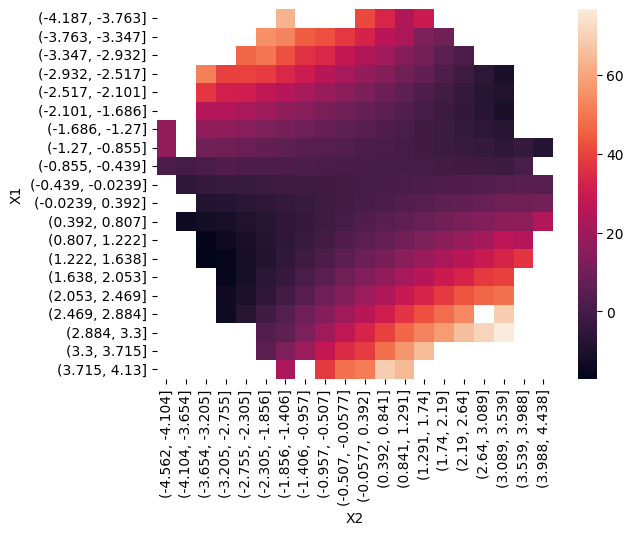

In [37]:
df2 = pd.DataFrame()
df2["X1"] = pd.cut(df.X1, bins = 20)
df2["X2"] = pd.cut(df.X2, bins = 20)
df2["Y"] = Y
sns.heatmap(pd.pivot_table(data = df2, index = "X1", columns = "X2", values = "Y", aggfunc = "mean"))

In [45]:
df_formula = df.copy()
df_formula["Y"] = Y
model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2) + I(X2**2)', data=df_formula)
results = model.fit()
results.params

Intercept     0.008639
X1            0.998380
X2            1.999487
X1:X2         4.000618
I(X1 ** 2)    2.997251
I(X2 ** 2)   -0.002523
dtype: float64

In [46]:
df_formula = df.copy()
df_formula["Y"] = Y
model = smf.ols(formula='Y ~ X1 + X2 + I(X1 * X2) + I(X1**2) + I(X2**2)', data=df_formula)
results = model.fit()
results.params

Intercept     0.008639
X1            0.998380
X2            1.999487
I(X1 * X2)    4.000618
I(X1 ** 2)    2.997251
I(X2 ** 2)   -0.002523
dtype: float64

# Preventing Overfitting

### With X2**2 term

In [48]:
np.random.seed(0)
np.set_printoptions(threshold=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
[x for x in kf.split(df_formula)]
[y[:100] for x in kf.split(df_formula) for y in x]

[array([  0,   1,   2,   4,   5,   7,   8,  10,  11,  12,  13,  15,  16,
         18,  19,  20,  21,  22,  24,  27,  28,  29,  30,  31,  32,  33,
         35,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  49,  50,
         53,  55,  57,  58,  59,  61,  62,  64,  66,  67,  70,  71,  73,
         74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 106, 107, 108, 111, 112, 113, 114, 115, 116, 118,
        120, 122, 123, 124, 126, 127, 129, 130, 131]),
 array([  3,   6,   9,  14,  17,  23,  25,  26,  34,  36,  41,  48,  51,
         52,  54,  56,  60,  63,  65,  68,  69,  72,  79,  90, 105, 109,
        110, 117, 119, 121, 125, 128, 133, 151, 156, 157, 165, 166, 170,
        181, 184, 187, 190, 191, 193, 196, 200, 208, 213, 216, 217, 218,
        220, 223, 240, 248, 258, 272, 275, 276, 278, 281, 284, 285, 286,
        292, 301, 302, 305, 320, 321, 328, 338, 339, 345, 354, 355, 3

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2) + I(X2**2)', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

0.9999718521581918


### Without X2**2 term

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2 + I(X1**2)', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

0.999966656715406


### Without either squared term

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

rmse_list = list()
for train_index, test_index in kf.split(df_formula):
    #X = df_formula[train_index].drop(columns = ["Y"])
    #Y = df_formula[train_index].Y
    model = smf.ols(formula='Y ~ X1 * X2', data=df_formula.iloc[train_index])
    results = model.fit()
    prediction = results.predict(df_formula.iloc[test_index])
    rmse_list.append(root_mean_squared_error(prediction, df_formula.iloc[test_index].Y))
print(sum(rmse_list) / len(rmse_list))

4.364350389924573
